In [1]:
import IPython.display as display

#display.YouTubeVideo("iinQDhsdE9s")

osm = """
<iframe width="425" 
        height="350" 
        frameborder="0" 
        scrolling="no" 
        marginheight="0" 
        marginwidth="0" 
        src="http://www.openstreetmap.org/export/embed.html?bbox=-2.9662737250328064%2C53.400500637844594%2C-2.964626848697662%2C53.402550738394034&amp;layer=mapnik" 
        style="border: 1px solid black">
</iframe>
<br/>
<small>
    <a href="http://www.openstreetmap.org/#map=19/53.40153/-2.96545">View Larger Map</a>
</small>
"""

display.HTML(osm)

GeoPandas exemplo de uso


In [2]:
import pandas as pd
import osmnx
import geopandas
import rioxarray
import xarray
import datashader
import contextily as cx
from shapely import geometry
import matplotlib.pyplot as plt

source_url = (
    "https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip"

)

gt_polygons = geopandas.read_file(source_url)
gt_polygons["centroid"] = gt_polygons.geometry.centroid
gt_polygons.head()

# type(gt_polygons.geometry[0])

gt_polygons

C:\Users\2001h\AppData\Local\Temp\ipykernel_15424\1302964372.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gt_polygons["centroid"] = gt_polygons.geometry.centroid


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,centroid
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",POINT (117.27043 -2.22296)
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",POINT (109.69887 3.79239)
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",POINT (-71.36437 -37.74361)
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",POINT (-64.68475 -16.70688)
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",POINT (-74.37806 -9.15439)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,1,Macao S.A.R,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((113.5586 22.16303, 113.56943 2...",POINT (113.5502 22.15778)
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,Ashmore and Cartier Islands,...,None,None,None,None,None,None,None,None,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4...",POINT (123.58637 -12.43258)
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,1,Bajo Nuevo Bank (Petrel Is.),...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-79.98929 15.79495, -79.98782 15.796...",POINT (-79.98787 15.79501)
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-78.63707 15.86209, -78.64041 15.864...",POINT (-78.63812 15.86446)


Show centroids as points

<Axes: >

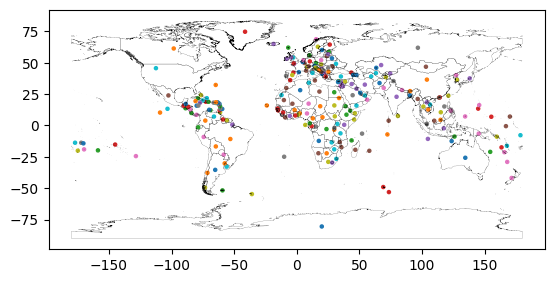

In [3]:
ax = gt_polygons.set_geometry("centroid").plot("ADMIN", markersize=5)

gt_polygons.plot(
    "ADMIN",
    ax=ax,
    facecolor='none',
    edgecolor='k',
    linewidth=0.1
)

Consultar centroids por país ("ADMIN")

<Axes: >

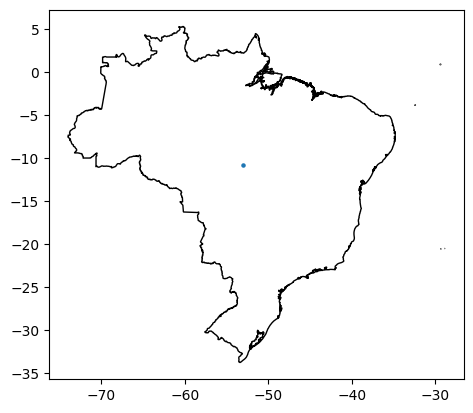

In [4]:
brasil_polygon =  gt_polygons.query('ADMIN == "Brazil"')
brasil_centroid = gt_polygons.set_geometry("centroid").query('ADMIN == "Brazil"').plot("ADMIN", markersize=5)

brasil_polygon.plot("ADMIN", ax=brasil_centroid, facecolor='None', edgecolor='k')
#brasil_polygon.geometry

Pontos extremos do território Brasileiro

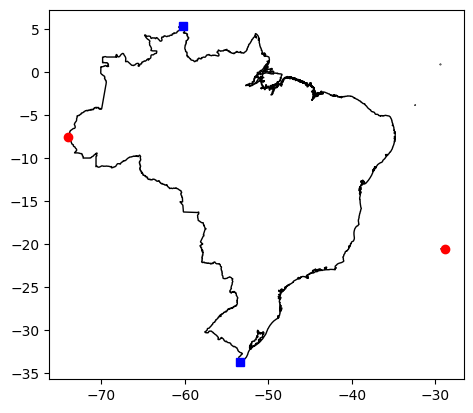

In [5]:
import matplotlib.pyplot as plt
from shapely.geometry import Point

polygons = brasil_polygon.geometry
all_polygons = [
    polygon.exterior.coords 
        for multi_polygon in polygons
        for polygon in multi_polygon.geoms
    ]

all_coords_flat = [
    coord for polygon in all_polygons
        for coord in polygon
    ]

ponto_oriental_x = max(all_coords_flat, key=lambda x: x[0])
ponto_ocidental_x = min(all_coords_flat, key=lambda x: x[0])
ponto_topo_y =  max(all_coords_flat, key=lambda y: y[1])
ponto_baixo_y =  min(all_coords_flat, key=lambda y: y[1])

ponto_ocidental = Point(ponto_ocidental_x)
ponto = Point(ponto_oriental_x)

ponto_topo = Point(ponto_topo_y)
ponto_baixo = Point(ponto_baixo_y)

fig, ax = plt.subplots()

brasil_polygon.plot("ADMIN", ax=ax, facecolor='None', edgecolor='k')

ax.plot(ponto.x, ponto.y, "ro", markersize=6)
ax.plot(ponto_ocidental.x, ponto_ocidental.y, "ro", markersize=6)

ax.plot(ponto_topo.x, ponto_topo.y, "bs", markersize=6)
ax.plot(ponto_baixo.x, ponto_baixo.y, "bs", markersize=6)


plt.show()

*TOKYO CLEAN DATASET* para converter para o GeoPandas

Importar Dataset Tokyo Clean

In [6]:
tc_points = pd.read_csv("data/tokyo_clean.csv")

tc_points

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06
...,...,...,...,...,...,...,...
9995,26981415@N00,139.582672,35.532785,2007-10-29 17:06:59.0,http://www.flickr.com/photos/26981415@N00/1797...,1.553827e+07,4.236522e+06
9996,36516818@N00,139.749461,35.696870,2006-08-26 13:59:06.0,http://www.flickr.com/photos/36516818@N00/2623...,1.555684e+07,4.258991e+06
9997,92996378@N00,139.770298,35.670336,2007-03-19 16:37:15.0,http://www.flickr.com/photos/92996378@N00/4321...,1.555916e+07,4.255354e+06
9998,95795770@N00,139.739075,35.642470,2008-08-13 17:12:36.0,http://www.flickr.com/photos/95795770@N00/2759...,1.555568e+07,4.251537e+06


Converter DataFrame para GeoDataFrame

In [7]:
tc_geoms = geopandas.points_from_xy(
    x=tc_points['longitude'],
    y=tc_points['latitude'],
    crs="EPSG:4326"
)

tc_points = geopandas.GeoDataFrame(tc_points, geometry=tc_geoms)
tc_points

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y,geometry
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06,POINT (139.7005 35.674)
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06,POINT (139.76652 35.7091)
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06,POINT (139.76563 35.69448)
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06,POINT (139.78439 35.54859)
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06,POINT (139.76875 35.67152)
...,...,...,...,...,...,...,...,...
9995,26981415@N00,139.582672,35.532785,2007-10-29 17:06:59.0,http://www.flickr.com/photos/26981415@N00/1797...,1.553827e+07,4.236522e+06,POINT (139.58267 35.53278)
9996,36516818@N00,139.749461,35.696870,2006-08-26 13:59:06.0,http://www.flickr.com/photos/36516818@N00/2623...,1.555684e+07,4.258991e+06,POINT (139.74946 35.69687)
9997,92996378@N00,139.770298,35.670336,2007-03-19 16:37:15.0,http://www.flickr.com/photos/92996378@N00/4321...,1.555916e+07,4.255354e+06,POINT (139.7703 35.67034)
9998,95795770@N00,139.739075,35.642470,2008-08-13 17:12:36.0,http://www.flickr.com/photos/95795770@N00/2759...,1.555568e+07,4.251537e+06,POINT (139.73908 35.64247)


**Surfaces**

*Dataset Mundo - População São Paulo*

In [8]:
pop = rioxarray.open_rasterio('./data/ghsl_sao_paulo.tif')
pop

<xarray.DataArray (band: 1, y: 416, x: 468)> Size: 779kB
[194688 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 4kB -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
  * y            (y) float64 3kB -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -200.0
    scale_factor:   1.0
    add_offset:     0.0

Verify pop data (DataArray)

In [9]:
type(pop)

xarray.core.dataarray.DataArray

DataArray shape

In [10]:
pop.shape

(1, 416, 468)

Reduce to two dimension 

In [11]:
pop.sel(band=1)

<xarray.DataArray (y: 416, x: 468)> Size: 779kB
[194688 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 4kB -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
  * y            (y) float64 3kB -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -200.0
    scale_factor:   1.0
    add_offset:     0.0

Plotar São Paulo - Distribuição da População

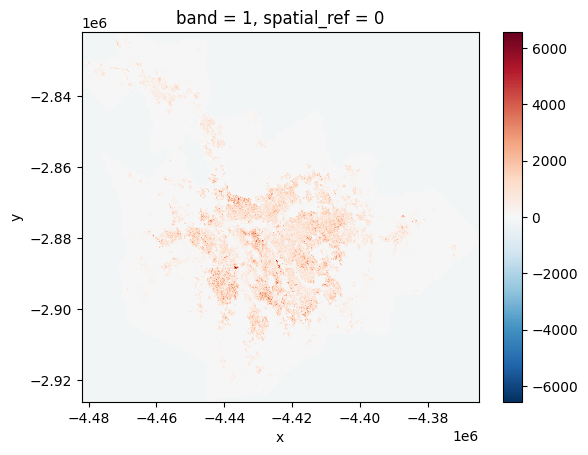

In [12]:
pop.sel(band=1).plot()

Pop. São Paulo - Exemplo de Filtragem

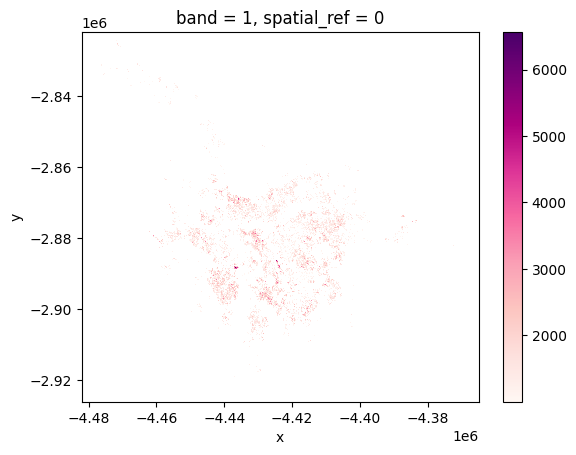

In [13]:
pop.where(pop > 1000).sel(band=1).plot(cmap="RdPu");

**Spatial graphs** 

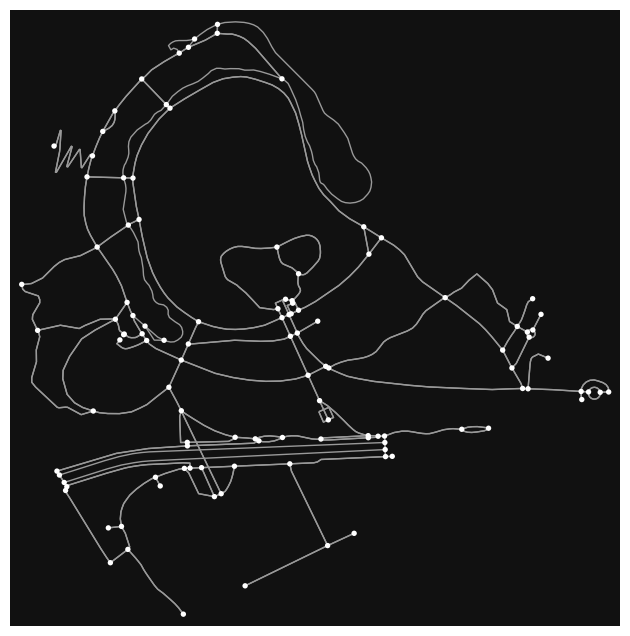

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [14]:
graph = osmnx.graph_from_place("Yoyogi Park, Shibuya, Tokyo, Japan")
# graph = osmnx.load_graphml("../data/cache/yoyogi_park_graph.graphml") - Cached way

osmnx.plot_graph(graph)

Quantitade de Nodes (Intersecções de ruas)

In [15]:
len(graph.nodes)

114

Quantidade de edges (Ruas)

In [16]:
len(graph.edges)

309

Consultando Nodes Exemplo

In [17]:
graph.nodes[1520546819]

{'y': 35.6711267, 'x': 139.6925951, 'street_count': 4}

Consultando bordas (Ruas) exemplo

In [18]:
graph.edges[(1520546819, 3010293622, 0)]

{'osmid': 138670840,
 'highway': 'footway',
 'oneway': False,
 'reversed': False,
 'length': np.float64(59.113074370021955),
 'geometry': <LINESTRING (139.693 35.671, 139.693 35.671, 139.693 35.671)>}

Nodes conectados ao node 1520546819

In [19]:
list(graph.adj[1520546819].keys())

[3010293622, 5764960322, 1913626649, 1520546959]

***Hibridos***

Acabamos de ver como tabelas geográficas, superfícies e redes mapeiam em objetos como GeoDataFrames, DataArrays e Graph em Python, respectivamente. Eles representam os pares convencionais que alinham modelos de dados a estruturas de dados com representações Python.

No entanto, embora os pares convencionais sejam bem utilizados, há outros em uso ativo e muitos outros ainda a serem desenvolvidos. Curiosamente, muitos novos pares são impulsionados por novos desenvolvimentos em tecnologia, permitindo abordagens que não eram possíveis no passado ou criando situações (por exemplo, grandes conjuntos de dados) que tornam a abordagem convencional limitante. 

Portanto, nesta segunda seção do capítulo, saímos um pouco da caixa para explorar casos em que pode fazer sentido representar um conjunto de dados com uma estrutura de dados que pode não ser a escolha inicial mais óbvia.

**Superficies como tabelas**

*Um pixel por vez*

In [20]:
surface = rioxarray.open_rasterio("data/ghsl_sao_paulo.tif")

t_surface = surface.to_series()

t_surface.head()

band  y           x         
1     -2822125.0  -4481875.0   -200.0
                  -4481625.0   -200.0
                  -4481375.0   -200.0
                  -4481125.0   -200.0
                  -4480875.0   -200.0
dtype: float32

Expressar a superficie como DataFrame

In [21]:
t_surface = t_surface.reset_index().rename(columns={0: "num_people"})
t_surface

,band,y,x,num_people
0,1,-2822125.0,-4481875.0,-200.0
1,1,-2822125.0,-4481625.0,-200.0
2,1,-2822125.0,-4481375.0,-200.0
3,1,-2822125.0,-4481125.0,-200.0
4,1,-2822125.0,-4480875.0,-200.0
...,...,...,...,...
194683,1,-2925875.0,-4366125.0,-200.0
194684,1,-2925875.0,-4365875.0,-200.0
194685,1,-2925875.0,-4365625.0,-200.0
194686,1,-2925875.0,-4365375.0,-200.0


Agora com o DataFrame, fica mais fácil consultar dados

In [22]:
t_surface.query("num_people > 5000.0")

,band,y,x,num_people
120505,1,-2886375.0,-4424625.0,5312.798828
123733,1,-2888125.0,-4436625.0,6563.036621
124201,1,-2888375.0,-4436625.0,5049.083984


Converter a representação de cada pixel para uma tabela geográfica

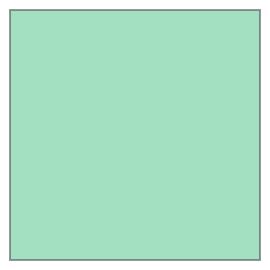

In [23]:
def row2cell(row, res_xy):
    res_x, res_y = res_xy  # Extract resolution for each dimension
    # XY Coordinates are centered on the pixel
    minX = row["x"] - (res_x / 2)
    maxX = row["x"] + (res_x / 2)
    minY = row["y"] + (res_y / 2)
    maxY = row["y"] - (res_y / 2)
    poly = geometry.box(
        minX, minY, maxX, maxY
    )  # Build squared polygon
    return poly

row2cell(t_surface.loc[0, :], surface.rio.resolution())

Agora, para células com mais de 1000 pessoas, podemos criar tabelas geográficas importantes

In [24]:
max_polys = (
    t_surface.query(
        "num_people > 1000"
    )  # Keep only cells with more than 1k people
    .apply(  # Build polygons for selected cells
        row2cell, res_xy=surface.rio.resolution(), axis=1
    )
    .pipe(  # Pipe result from apply to convert into a GeoSeries
        geopandas.GeoSeries, crs=surface.rio.crs
    )
)

max_polys

3785      POLYGON ((-4471500 -2824250, -4471500 -2824000...
4252      POLYGON ((-4471750 -2824500, -4471750 -2824250...
5658      POLYGON ((-4471250 -2825250, -4471250 -2825000...
6126      POLYGON ((-4471250 -2825500, -4471250 -2825250...
6595      POLYGON ((-4471000 -2825750, -4471000 -2825500...
                                ...                        
178515    POLYGON ((-4430000 -2917500, -4430000 -2917250...
178516    POLYGON ((-4429750 -2917500, -4429750 -2917250...
178983    POLYGON ((-4430000 -2917750, -4430000 -2917500...
179904    POLYGON ((-4433750 -2918250, -4433750 -2918000...
181296    POLYGON ((-4436750 -2919000, -4436750 -2918750...
Length: 7734, dtype: geometry

Plotando os poligonos do GeoSeries gerado

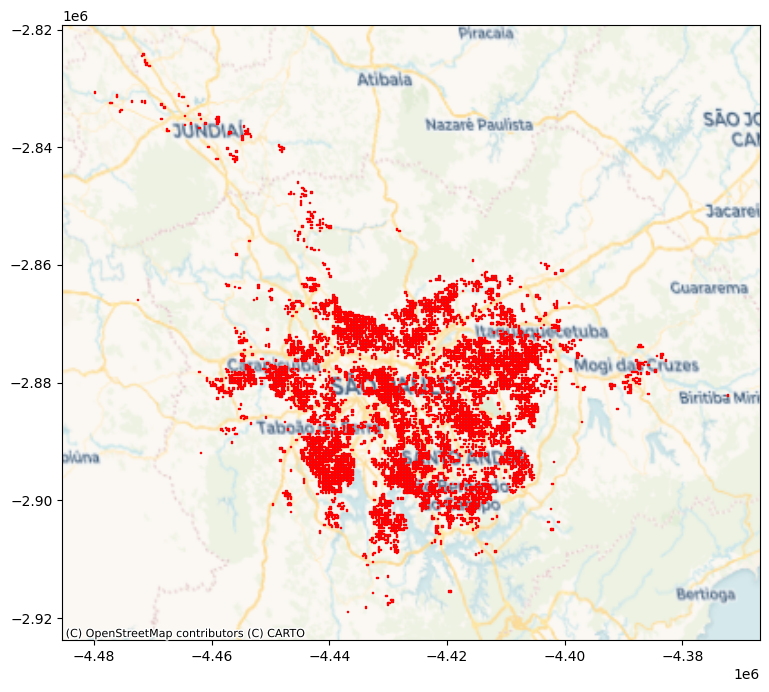

In [25]:
# Plot polygons
ax = max_polys.plot(edgecolor="red", figsize=(9, 9))
# Add basemap
cx.add_basemap(
    ax, crs=surface.rio.crs, source=cx.providers.CartoDB.Voyager
);

Convertendo o DataFrame de volta para seu formato original (DataArray)

In [26]:
new_da = xarray.DataArray.from_series(
    t_surface.set_index(["band", "y", "x"])["num_people"]
)

new_da.head()

<xarray.DataArray 'num_people' (band: 1, y: 5, x: 5)> Size: 100B
array([[[-200., -200., -200., -200., -200.],
        [-200., -200., -200., -200., -200.],
        [-200., -200., -200., -200., -200.],
        [-200., -200., -200., -200., -200.],
        [-200., -200., -200., -200., -200.]]], dtype=float32)
Coordinates:
  * band     (band) int64 8B 1
  * y        (y) float64 40B -2.926e+06 -2.926e+06 ... -2.925e+06 -2.925e+06
  * x        (x) float64 40B -4.482e+06 -4.482e+06 ... -4.481e+06 -4.481e+06

Pixels para Poligonos

Importar ferramentas e datasets